<a href="https://colab.research.google.com/github/JotaDC/TelecomX_parte2/blob/main/TelecomX_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

##Leer y cargar datos en DataFrame

In [38]:
import pandas as pd
import numpy as np
url="datos_tratados.csv"
df=pd.read_csv(url)
df.head()


,id_cliente,se_fue,genero,mayor_de_65,pareja,dependientes,meses_de_contrato,suscripcion_telefonia,suscripcion_a_mas_de_una_linea_telefonica,suscripcion_internet,...,suscripcion_proteccion_de_dispositivos,suscripcion_soporte_tecnico,suscripicion_streaming_tv,suscripcion_streaming_peliculas,tipo_contrato,factura_online,forma_de_pago,total_mensual,total_gastado,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


##🛠️ Preparación de los Datos

###Listar valores unicos por columna

In [39]:
#Listar valores unicos por columna
for col in df.columns:
   print(f"Valores unicos para la columna {col}:")
   print(df[col].unique())
   print("-"*80)

Valores unicos para la columna id_cliente:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------------------------------------------------------------------
Valores unicos para la columna se_fue:
['No' 'Yes']
--------------------------------------------------------------------------------
Valores unicos para la columna genero:
['Female' 'Male']
--------------------------------------------------------------------------------
Valores unicos para la columna mayor_de_65:
[0 1]
--------------------------------------------------------------------------------
Valores unicos para la columna pareja:
['Yes' 'No']
--------------------------------------------------------------------------------
Valores unicos para la columna dependientes:
['Yes' 'No']
--------------------------------------------------------------------------------
Valores unicos para la columna meses_de_contrato:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 

In [40]:
#Listar Nombres de las columnas
df.columns

Index(['id_cliente', 'se_fue', 'genero', 'mayor_de_65', 'pareja',
       'dependientes', 'meses_de_contrato', 'suscripcion_telefonia',
       'suscripcion_a_mas_de_una_linea_telefonica', 'suscripcion_internet',
       'suscripcion_seguridad_en_linea', 'suscripcion_backup_en_linea',
       'suscripcion_proteccion_de_dispositivos', 'suscripcion_soporte_tecnico',
       'suscripicion_streaming_tv', 'suscripcion_streaming_peliculas',
       'tipo_contrato', 'factura_online', 'forma_de_pago', 'total_mensual',
       'total_gastado', 'cuentas_diarias'],
      dtype='object')

### Eliminar Columna no relevante

In [41]:
# Crear copia del df
df_limpio = df.copy()

# Eliminar Columna no relevante para el analisis
df_limpio = df_limpio.drop(columns=['id_cliente'])

### Agrupar Datos con "No interet service" y "No Phone service" como "No"

In [42]:
#Agrupar "No internet service" como "No"
columnas = [
    'suscripcion_seguridad_en_linea', 'suscripcion_backup_en_linea', 'suscripcion_seguridad_en_linea', 'suscripcion_proteccion_de_dispositivos',
    'suscripcion_soporte_tecnico', 'suscripicion_streaming_tv', 'suscripcion_streaming_peliculas'
]

for col in columnas:
    df_limpio[col] = df_limpio[col].replace('No internet service', 'No')

columnas= ['suscripcion_a_mas_de_una_linea_telefonica']

for col in columnas:
    df_limpio[col] = df_limpio[col].replace('No phone service', 'No')


### One-hot encoding

In [43]:

#One-hot encoding (sin dummy trap)
categorical_cols = [
       'se_fue', 'genero', 'mayor_de_65', 'pareja',
       'dependientes', 'suscripcion_telefonia',
       'suscripcion_a_mas_de_una_linea_telefonica', 'suscripcion_internet',
       'suscripcion_seguridad_en_linea', 'suscripcion_backup_en_linea',
       'suscripcion_proteccion_de_dispositivos', 'suscripcion_soporte_tecnico',
       'suscripicion_streaming_tv', 'suscripcion_streaming_peliculas',
       'tipo_contrato', 'factura_online', 'forma_de_pago'
]

df_encoded = pd.get_dummies(df_limpio, columns=categorical_cols, drop_first=True)

df_encoded

,meses_de_contrato,total_mensual,total_gastado,cuentas_diarias,se_fue_Yes,genero_Male,mayor_de_65_1,pareja_Yes,dependientes_Yes,suscripcion_telefonia_Yes,...,suscripcion_proteccion_de_dispositivos_Yes,suscripcion_soporte_tecnico_Yes,suscripicion_streaming_tv_Yes,suscripcion_streaming_peliculas_Yes,tipo_contrato_One year,tipo_contrato_Two year,factura_online_Yes,forma_de_pago_Credit card (automatic),forma_de_pago_Electronic check,forma_de_pago_Mailed check
0,9,65.60,593.30,2.186667,False,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,9,59.90,542.40,1.996667,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,4,73.90,280.85,2.463333,True,True,False,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,13,98.00,1237.85,3.266667,True,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,3,83.90,267.40,2.796667,True,False,True,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,13,55.15,742.90,1.838333,False,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7028,22,85.10,1873.70,2.836667,True,True,False,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7029,2,50.30,92.75,1.676667,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7030,67,67.85,4627.65,2.261667,False,True,False,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [44]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   meses_de_contrato                              7032 non-null   int64  
 1   total_mensual                                  7032 non-null   float64
 2   total_gastado                                  7032 non-null   float64
 3   cuentas_diarias                                7032 non-null   float64
 4   se_fue_Yes                                     7032 non-null   bool   
 5   genero_Male                                    7032 non-null   bool   
 6   mayor_de_65_1                                  7032 non-null   bool   
 7   pareja_Yes                                     7032 non-null   bool   
 8   dependientes_Yes                               7032 non-null   bool   
 9   suscripcion_telefonia_Yes                      7032 

In [52]:
# Verifica si hay valores nulos
df_encoded.isnull().sum()

,0
meses_de_contrato,0
total_mensual,0
total_gastado,0
cuentas_diarias,0
se_fue_Yes,0
genero_Male,0
mayor_de_65_1,0
pareja_Yes,0
dependientes_Yes,0
suscripcion_telefonia_Yes,0


###Matriz de Correlación

In [53]:
corr = df_encoded.corr()

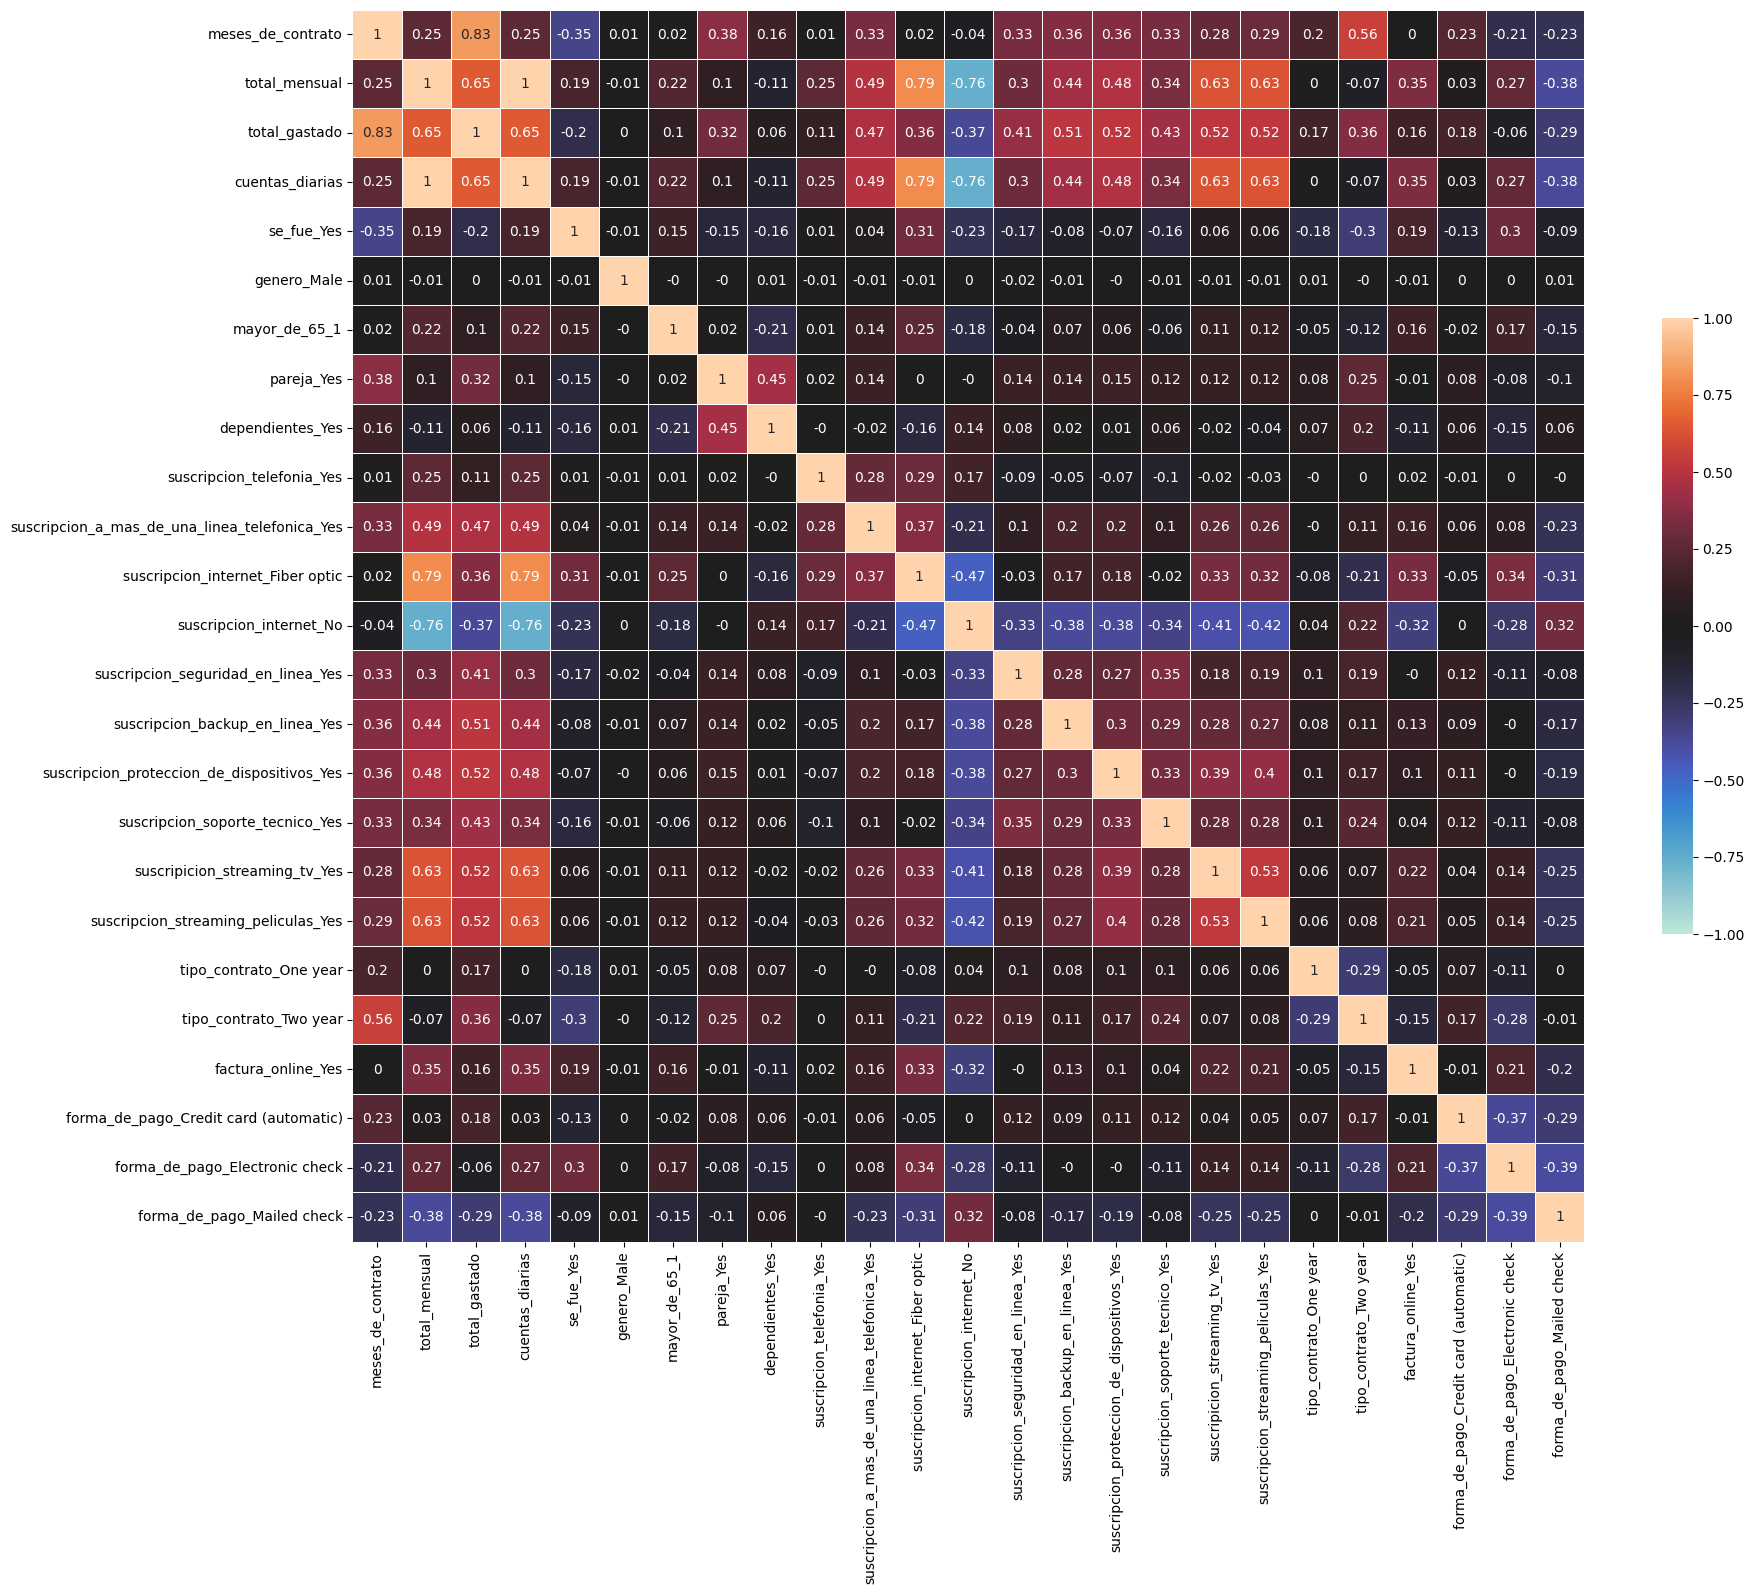

In [54]:
import numpy as np # Import the numpy library
import matplotlib.pyplot as plt # Import the matplotlib library
import seaborn as sns # Import the seaborn library

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()